# Cas pratique clustering

Le but de ce cas pratique est de réviser l'ensemble des algorithmes que nous avons vu ensemble dernièrement.  

## Les données 
Les données auxquelles nous nous intéressons sont celles de l'absentéisme dans une entreprise brésilienne. Les données sont dans le fichier csv `Absenteeism_at_work.csv` et leur description dans le fichier word `Attribute information`.   

## Première analyse en CAH  
Nous nous intéressons tout d'abord à essayer de regrouper les raisons de l'absence en moins de catégories qu'actuellement. Pour cela, nous allons mener une classification ascendante hiérarchique sur les variables explicatives de raisons de l'absence que nous avons à disposition. Nous allons utiliser l'ensemble des variables à notre disposition __sauf l'absentéisme en heures et les raisons de l'absence__.  

- Importez les données. Dans une nouvelle table stockez les variables qui nous intéressent et transformez les variables catégoriques en `dummies`.  


In [225]:
# Import des données
import pandas as pd 

abs_data = pd.read_csv("Absenteeism_at_work_AAA/Absenteeism_at_work.csv", sep = ";")
abs_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [226]:
# On ne garde que les variables qui nous intéressent
abs_data_var = abs_data.drop(["ID", "Reason for absence", "Absenteeism time in hours", "Seasons", 
                              "Month of absence", "Day of the week"], axis = 1)
abs_data_var.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [227]:
# On crée les dummies
abs_data_var = pd.get_dummies(abs_data_var, columns = ["Education"])
abs_data_var.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Education_1,Education_2,Education_3,Education_4
0,289,36,13,33,239.554,97,0,2,1,0,1,90,172,30,1,0,0,0
1,118,13,18,50,239.554,97,1,1,1,0,0,98,178,31,1,0,0,0
2,179,51,18,38,239.554,97,0,0,1,0,0,89,170,31,1,0,0,0
3,279,5,14,39,239.554,97,0,2,1,1,0,68,168,24,1,0,0,0
4,289,36,13,33,239.554,97,0,2,1,0,1,90,172,30,1,0,0,0


- Mettez l'ensemble des variables à la même échelle avec le `MinMaxScaler` de scikit learn, qui permet de mettre les variables continues à la même échelle que les `dummies`.

In [228]:
# MinMaxscaler ne modifie pas les dummies et permet de mettre les
# variables continues à la même échelle entre 0 et 1

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
abs_data_cr = scale.fit_transform(abs_data_var.to_numpy())

 
- Affichez le dendogramme d'une analyse CAH et justifiez un choix de nombre de classes.  


In [229]:
from scipy.cluster.hierarchy import dendrogram, linkage

# On fait d'abord la matrice de liens : 
mat_lien = linkage(abs_data_cr, method='ward', metric='euclidean')
mat_lien

array([[   0.        ,    4.        ,    0.        ,    2.        ],
       [   2.        ,    5.        ,    0.        ,    2.        ],
       [  13.        ,  741.        ,    0.        ,    3.        ],
       ...,
       [1463.        , 1471.        ,   11.61851049,  125.        ],
       [1469.        , 1476.        ,   15.76566249,  313.        ],
       [1475.        , 1477.        ,   21.9835531 ,  740.        ]])

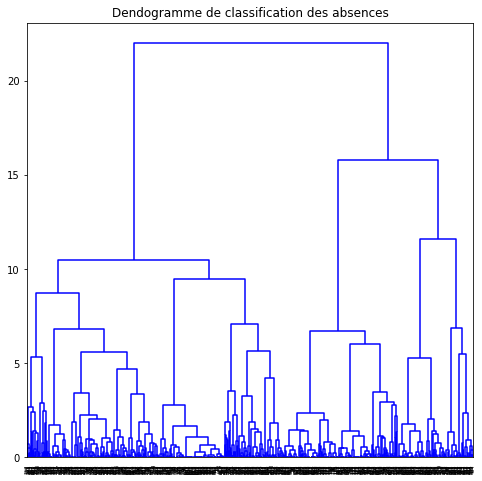

In [230]:
# Puis on peut afficher notre dendogramme : 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendrogramme de classification des absences")
dendrogram(mat_lien, orientation='top', color_threshold=0)
plt.show()

- Procédez à la classification de vos données en fonction de ce nombre de classes.

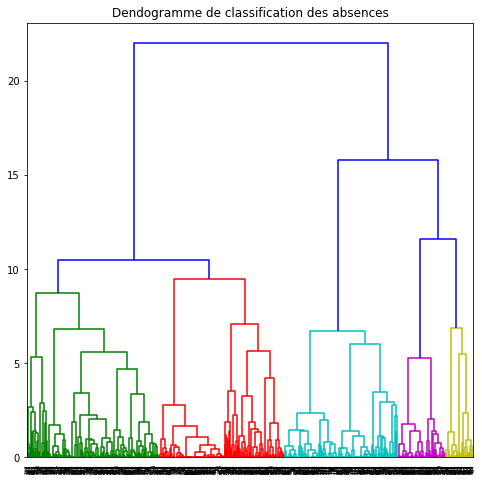

In [231]:
# On choisit 5 classes: 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des absences")
dendrogram(mat_lien, orientation='top', color_threshold=10)
plt.show()

  - Affichez le tableau croisé des occurences des raisons pour l'absence et de vos classes obtenues. Y-a-t-il matière à faire un regroupement?

In [233]:
# On crée nos 5 classes
from scipy.cluster.hierarchy import fcluster
classes_cah = fcluster(mat_lien, t = 10, criterion = 'distance')

# On regarde la répartition des motifs d'absence dans ces classes : 
freq_cah_motifs = pd.crosstab(classes_cah, abs_data["Reason for absence"])

freq_cah_motifs.iloc[:, range(11)]

Reason for absence,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
1,9,4,0,1,1,0,1,6,1,2,9
2,25,2,0,0,0,2,2,0,0,0,5
3,5,3,0,0,1,1,4,6,3,2,7
4,1,5,0,0,0,0,1,2,0,0,1
5,3,2,1,0,0,0,0,1,2,0,3


In [234]:
freq_cah_motifs.iloc[:, range(11, 22)]

Reason for absence,11,12,13,14,15,16,17,18,19,21,22
row_0,,,,,,,,,,,
1,4,1,16,10,2,0,0,5,21,0,26
2,7,2,18,3,0,0,0,5,6,2,1
3,9,2,7,5,0,0,0,4,9,0,4
4,2,2,13,1,0,1,0,3,1,2,4
5,4,1,1,0,0,2,1,4,3,2,3


In [235]:
freq_cah_motifs.iloc[:, range(22, len(freq_cah_motifs.columns))]

Reason for absence,23,24,25,26,27,28
row_0,,,,,,
1,31,3,2,14,0,51
2,37,0,4,11,38,37
3,61,0,12,4,16,23
4,16,0,6,2,15,1
5,4,0,7,2,0,0


## Réduction du nombre de dimensions du problème  : Analyse en Composantes Principales  

Nous allons maintenant tenter de mettre en oeuvre une ACP.  

- En affichant le graphique de l'évolution du ratio de la variance expliquée en fonction du nombre de composantes, justifiez du choix d'un nombre de composantes.  

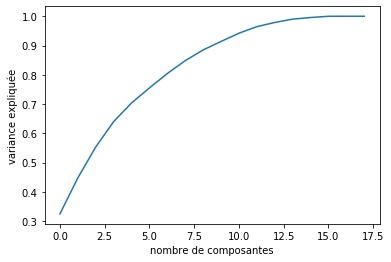

In [236]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(abs_data_cr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée')
plt.show()

On voit qu'autour de 5 - 10 composantes on explique près de 80% de la variance 

- Représentez graphiquement les points en fonction des deux premières composantes en colorant différemment selon la raison de l'absence. Trouve-t-on des regroupements qui coïncideraient avec les conclusions de la CAH?  Quel est le ratio de la variance expliqué par ces deux axes?  

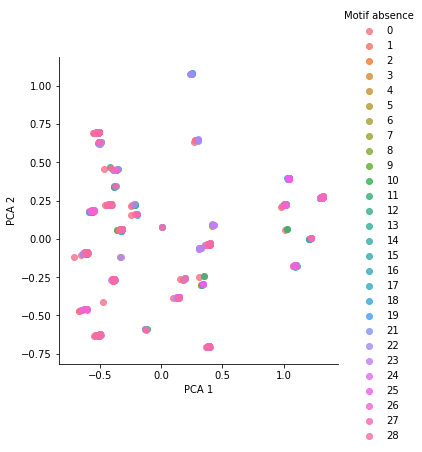

In [237]:
# On crée nos composantes
X_pca = pca.transform(abs_data_cr)

import seaborn as sns

df1 = pd.DataFrame(X_pca[:, range(2)])
df2 = abs_data[["Reason for absence"]]
data_acp = pd.concat([df1, df2], axis=1)
data_acp.columns = ["PCA 1", "PCA 2", "Motif absence"]

# plot en changeant de couleur selon raison de l'absence
sns.lmplot('PCA 1', 'PCA 2', data=data_acp, hue='Motif absence', fit_reg=False)
plt.show()

On voit quelques regroupements de points mais rien de clair vis à vis des motifs d'absence.

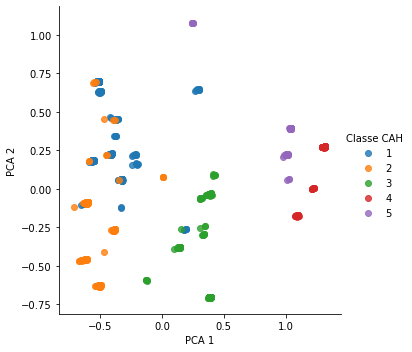

In [240]:
df1 = pd.DataFrame(X_pca[:, range(2)])
df2 = pd.DataFrame(classes_cah)
data_acp = pd.concat([df1, df2], axis=1)
data_acp.columns = ["PCA 1", "PCA 2", "Classe CAH"]

# plot en changeant de couleur selon raison de l'absence
sns.lmplot('PCA 1', 'PCA 2', data=data_acp, hue='Classe CAH', fit_reg=False)
plt.show()

La classification CAH n'a pas regroupé exactement comme le laisse suggérer la représentation sur les deux premières composantes mais on constate tout de même que certains points de la même classe ont tendance à être proches dans cet espace. Rappelons que cette représentation graphique doit être prise avec précaution puisque les deux premières composantes n'expliquent qu'une partie de la variance :  

In [241]:
# ratio de la variance expliquée par ces deux axes : 
pca.explained_variance_ratio_[range(2)].sum()

0.4473792946383809

## K-means et DBSCAN  
- Transformez les observations en fonction du nombre de composantes principales voulues en utilisant d'abord un algorithme de k-means puis un DBSCAN. 

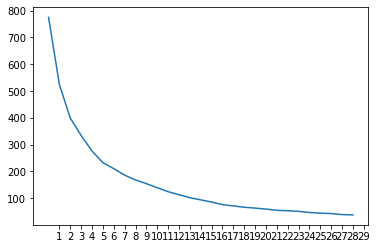

In [249]:
# Quel nombre de classes minimise l'inertie?
from sklearn.cluster import KMeans
inert_kmeans = []
for i in range(1, 30):
    inert_kmeans.append(KMeans(n_clusters = i).fit(X_pca).inertia_)

plt.plot(inert_kmeans)
plt.xticks(ticks=range(1, 30))
plt.show()


5 classes a l'air d'être un bon découpage, comme pour CAH.

In [250]:
# On a déjà entraîné le PCA sur le maximum d'axes possible, on choisit de ne garder que les 8 premiers axes : 
X_pca = X_pca[:, range(8)]

# kmeans sur ces variables avec 5 classes: 
km_abs = KMeans(n_clusters = 5)
km_abs.fit(X_pca)
classes_km_pca = km_abs.predict(X_pca)

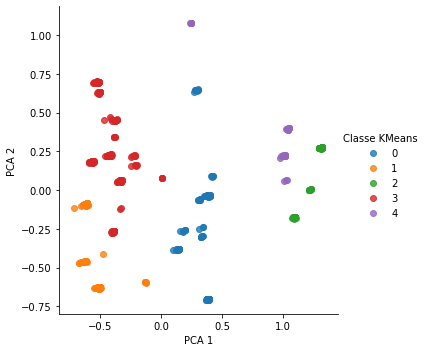

In [252]:
# On peut voir ce que ça donne sur le graphique : 
df1 = pd.DataFrame(X_pca[:, range(2)])
df2 = pd.DataFrame(classes_km_pca)
data_acp = pd.concat([df1, df2], axis=1)
data_acp.columns = ["PCA 1", "PCA 2", "Classe KMeans"]

# plot en changeant de couleur selon raison de l'absence
sns.lmplot('PCA 1', 'PCA 2', data=data_acp, hue='Classe KMeans', fit_reg=False)
plt.show()

In [253]:
# DBSCAN :  on essaye de voir quelle combinaison nous permet de retrouver environ 4 classes
from sklearn.cluster import DBSCAN

# Une astuce pour avoir une idée de l'ordre de grandeur des distances : 
from scipy.spatial.distance import pdist
import pandas as pd
pd.DataFrame(pdist(X_pca)).describe()


,0
count,273430.000000
mean,1.349343
std,0.525895
min,0.000000
25%,1.015717
50%,1.377477
75%,1.740937
max,2.726327


In [260]:
j = 1.2
i = 5
db = DBSCAN(eps=j, min_samples = i)
classes_db_pca = db.fit_predict(X_pca)
print(np.unique(classes_db_pca))

[0 1 2 3 4]


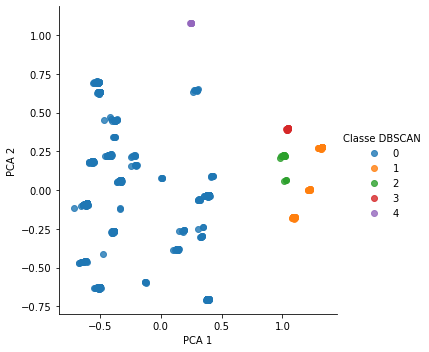

In [261]:
# On peut voir ce que ça donne sur le graphique : 
df1 = pd.DataFrame(X_pca[:, range(2)])
df2 = pd.DataFrame(classes_db_pca)
data_acp = pd.concat([df1, df2], axis=1)
data_acp.columns = ["PCA 1", "PCA 2", "Classe DBSCAN"]

# plot en changeant de couleur selon raison de l'absence
sns.lmplot('PCA 1', 'PCA 2', data=data_acp, hue='Classe DBSCAN', fit_reg=False)
plt.show()

- Comparez les résultats obtenus entre eux et avec la CAH.  

In [262]:
import pandas as pd
pd.crosstab(classes_cah, classes_km_pca)

col_0,0,1,2,3,4
row_0,,,,,
1,14,6,0,200,0
2,0,163,0,44,0
3,183,5,0,0,0
4,0,0,79,0,0
5,0,0,0,0,46


In [263]:
pd.crosstab(classes_cah, classes_db_pca)

col_0,0,1,2,3,4
row_0,,,,,
1,220,0,0,0,0
2,207,0,0,0,0
3,188,0,0,0,0
4,0,79,0,0,0
5,0,0,19,20,7


In [264]:
pd.crosstab(classes_km_pca, classes_db_pca)

col_0,0,1,2,3,4
row_0,,,,,
0,197,0,0,0,0
1,174,0,0,0,0
2,0,79,0,0,0
3,244,0,0,0,0
4,0,0,19,20,7


CAH et kmeans semblent donner des résultats proches alors que DBSCAN classifie très différemment de ces deux algorithmes! Difficile de savoir pour l'instant lequel de ces algorithmes va nous donner des résultats satisfaisants

- Refaites ces classifications k-means et DBSCAN avec cette fois l'ensemble des variables explicatives à disposition. 

In [266]:
# kmeans sur toutes les variables variables avec le nombre de groupes proposé par CAH : 
km_abs.fit(abs_data_cr)
classes_km = km_abs.predict(abs_data_cr)

# On compare avec et sans PCA
pd.crosstab(classes_km, classes_km_pca)

col_0,0,1,2,3,4
row_0,,,,,
0,0,174,0,0,0
1,0,0,79,0,0
2,0,0,0,0,46
3,197,0,0,0,0
4,0,0,0,244,0


L'ACP nous a permis de faire une classification identique à celle que nous aurions faite avec toutes les variables

In [270]:
# dbscan sur toutes les variables variables avec le nombre de groupes proposé par CAH :
j = 1.4
i = 5
db = DBSCAN(eps=j, min_samples = i)
classes_db = db.fit_predict(abs_data_cr)
print(np.unique(classes_db))

[-1  0  1  2  3]



On n'arrive pas vraiment à retrouver le même nombre de classes et une partie des observations n'appartient à aucune classe. 
Comparons avec le DBSCAN sur les variables transformées par PCA : 

In [271]:
pd.crosstab(classes_db, classes_db_pca)

col_0,0,1,2,3,4
row_0,,,,,
-1,4,0,0,0,0
0,611,0,0,0,0
1,0,79,0,0,0
2,0,0,19,20,0
3,0,0,0,0,7


La classe 2 de DBSCAN sans PCA regroupe les classes 2 et 3, sinon l'équivalence concorde. Seules 4 observations de la classe 0 avec PCA se retrouvent sans classe lors du DBSCAN sur toutes les variables.

## Caractérisations des classes  
On cherche à voir comment les variables "s'expriment" dans chaque classe : 

In [278]:
abs_data.groupby(classes_km).mean().iloc[:, range(10)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day
0,10.563218,20.344828,6.063218,3.896552,2.522989,176.603448,39.706897,17.695402,41.229885,266.276316
1,16.265823,18.810127,5.974684,4.050633,2.607595,202.392405,20.367089,10.329114,32.291139,263.809367
2,16.847826,15.891304,5.608696,4.000000,2.239130,245.543478,23.608696,9.456522,34.000000,273.298283
3,27.675127,19.197970,6.228426,3.730964,2.654822,203.898477,22.568528,10.461929,35.609137,275.633980
4,16.323770,19.184426,6.836066,4.016393,2.508197,268.864754,32.282787,11.881148,35.528689,274.008770


In [279]:
abs_data.groupby(classes_km).mean().iloc[:, range(10, len(abs_data.columns))]

,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,94.385057,0.074713,1.00000,0.333333,0.971264,0.000000,0.126437,93.339080,171.293103,31.971264,5.247126
1,95.088608,0.012658,3.00000,0.291139,0.000000,0.000000,0.291139,67.721519,172.177215,22.670886,5.265823
2,95.978261,0.065217,2.00000,1.021739,0.152174,0.434783,1.217391,72.108696,175.913043,23.086957,6.391304
3,94.888325,0.045685,1.00000,0.913706,0.000000,0.071066,1.345178,74.989848,169.507614,26.101523,6.121827
4,94.065574,0.057377,1.04918,1.827869,1.000000,0.081967,0.762295,77.069672,174.069672,25.340164,9.405738


On peut essayer de caractériser en fonction de leurs profils ainsi les 5 classes obtenues : 
- classe 0 : majorité de buveurs occasionnels, pas de fumeurs. IMC et poids supérieur à la moyenne. La distance moyenne de l'habitation au travail est plus élevé que pour le reste des personnes et l'absence résulte pour 7% des cas d'une faute de discipline. Ces absences sont plutôt moins longues en heures en moyenne que pour les autres classes.  Personnes plus âgées que la moyenne. Niveau de diplôme faible.  
- classe 1 : classe des plus diplômés. Pas buveur ni fumeur. Absences ne relevant quasiment jamais d'une faute disciplinaire, IMC plus bas que la moyenne.  
- classe 2 : Niveau de diplôme moyen, avec en moyenne 1 enfant. Classe avec plus de fumeurs occasionnels que les autres et quelques buveurs occasionnels, avec également plus d'animaux que la moyenne. Temps d'absence relativement élevé en heures.  
- classe 3 : Niveau de diplôme faible avec aussi 1 enfant en moyenne et plus souvent un animal de compagnie. Peu buveurs ou fumeurs.  
- classe 4 : Classe avec le plus d'enfants en moyenne (1,8) et aussi que des buveurs occasionnels. Les absences y sont les plus longues : 9.4 heures en moyenne

A croiser avec les raisons pour absence, comme fait plus haut!

Nombre de valeurs uniques d'ID par groupe : 

In [274]:
abs_data[["ID"]].groupby(classes_km).nunique()

,ID
0,6
1,3
2,4
3,11
4,13


In [282]:
abs_data.groupby(classes_db).mean().iloc[:, range(10)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day
-1,29.000000,20.750000,4.250000,5.250000,2.750000,225.000000,15.000000,15.000000,41.000000,244.304250
0,18.260229,19.509002,6.436989,3.882160,2.558101,221.931260,31.378069,13.058920,37.142390,272.525198
1,16.265823,18.810127,5.974684,4.050633,2.607595,202.392405,20.367089,10.329114,32.291139,263.809367
2,17.717949,15.384615,5.564103,3.974359,2.282051,247.794872,18.692308,10.974359,34.538462,273.661615
3,12.000000,18.714286,5.857143,4.142857,2.000000,233.000000,51.000000,1.000000,31.000000,271.274000


In [283]:
abs_data.groupby(classes_db).mean().iloc[:, range(10, len(abs_data.columns))]

,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
-1,98.500000,0.000000,4.0,2.000000,1.000000,0.000000,2.000000,94.000000,182.000000,28.000000,5.250000
0,94.392799,0.058920,1.0,1.106383,0.669394,0.055646,0.761047,80.921440,171.756137,27.456628,7.189853
1,95.088608,0.012658,3.0,0.291139,0.000000,0.000000,0.291139,67.721519,172.177215,22.670886,5.265823
2,95.948718,0.076923,2.0,1.025641,0.000000,0.512821,0.000000,72.846154,175.538462,23.461538,6.666667
3,96.142857,0.000000,2.0,1.000000,1.000000,0.000000,8.000000,68.000000,178.000000,21.000000,4.857143


Nombre de valeurs uniques d'ID par groupe : 

In [284]:
abs_data[["ID"]].groupby(classes_db).nunique()

,ID
-1,1
0,29
1,3
2,3
3,1


Il n'y a donc qu'une observation qui ne se voit pas attribuer de classes.

## Explication du temps d'absence   
On cherche maintenant à caractériser la longueur de l'absence, indépendemment de son motif.
- En reprenant l'analyse précédemment faite, regardez si le clustering peut aussi s'appliquer à la longueur de l'absence (absenteism in hours). Pour cela, regroupez cette variable en quelques classes que vous choisirez (pas d'absence - absence peu longue - absence longue - absence très longue). Pour déterminer les seuils qui discriminent le mieux les absences, vous pouvez utiliser une représentation graphique en fonction des deux premières composantes principales pour voir quelles nombres d'heures d'absence se trouvent aux mêmes endroits.


On peut essayer de voir comment se répartissent les longueurs d'absence sur nos deux premières composantes : 

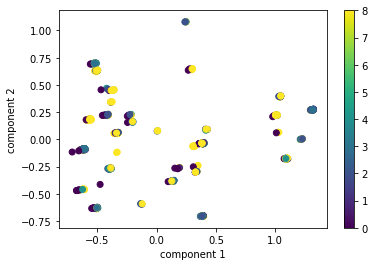

In [286]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=abs_data["Absenteeism time in hours"],
           vmin = 0, vmax = 8)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()